 ## **HOMEWORK 4**

Afonso Rosa, ist1106700<br>
Leticia Vong, ist1105991

**II. Programming and critical analysis** [11v]

In the next exercise you will use the accounts.csv dataset. This dataset contains account details of bank clients, and the target variable yis binary (‘has the client subscribed a term deposit?’). Select the first 8 features and remove duplicates and null values.
<br>

**1.** Normalize the data using MinMaxScaler: <br> <br>
**a.** [4v] Using sklearn, apply k-means clustering (without targets) on the normalized data with k={2,3,4,5,6,7,8}, max_iter=500 and random_state=42. Plot the different sum of squared errors (SSE) using the _inertia attribute of k-means according to the number of clusters.

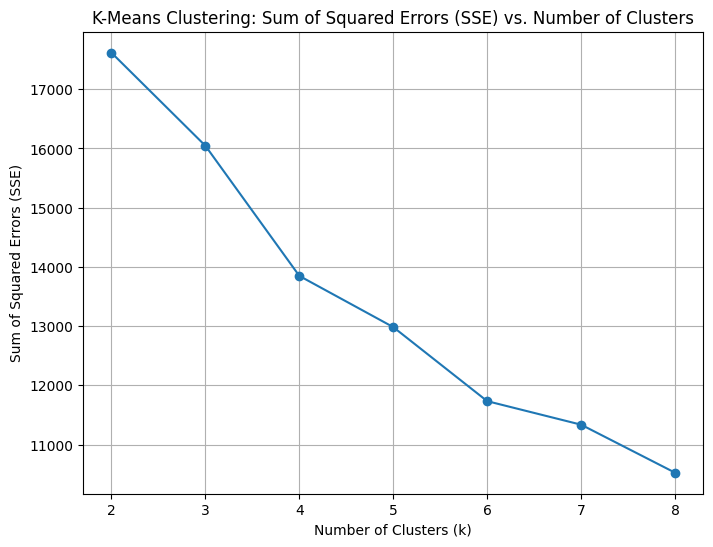

In [48]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('accounts.csv')

data = data.iloc[:, :8]

data = data.drop_duplicates()
data = data.dropna()

data = pd.get_dummies(data, drop_first=True)

scaler = MinMaxScaler()
data_scaled_minMax = scaler.fit_transform(data)

k_values = [2, 3, 4, 5, 6, 7, 8]

sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(data_scaled_minMax)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.title('K-Means Clustering: Sum of Squared Errors (SSE) vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


**b.** [1.5v] According to the previous plot, how many underlying customer segments (clusters) should there be? Explain based on the trade-off between the clusters and inertia.

EXPLICAR TRADE OFFS?

De k=2 a k=4 há uma grande diminuição do valor de SSE, o que indica que aumentar o número de clusters neste intervalo reduz significativamente a variância para cada cluster, tal que sugere que esse aumento melhora o modelo.

Para valores de k maiores que 4, a descida já não é tão acentuada, o que mostra que adicionar mais clusters não vai ter tanta influência na redução de SSE e na melhoria do modelo.

Esta análise mostra-nos que o valor ideal de clusters seria 4, o que permitiria um equilíbrio entre a exatidão e a complexidade do modelo.


**c.** [1.5v] Would k-modes be a better clustering approach? Explain why based on the dataset features

Practical Consideration:
•	Check the Data: If the dataset has been transformed using pd.get_dummies() (as per the original instruction), categorical variables might have been converted into binary indicator variables (0 or 1). In such cases, K-Means could still work well because these binary features can now be treated as numerical, and the Euclidean distance may still be effective.


Why Not K-Modes?
•	K-Modes is designed for clustering categorical data and uses a different distance metric that works well with categories. However, it does not handle numerical data effectively because:
o	It doesn’t use the concept of mean or distance appropriate for continuous values (like age or balance).
o	Thus, it wouldn’t properly account for the variation in your numerical features, which might be important in distinguishing customer segments.


Use K-Means if your dataset is primarily numerical or if the categorical features have been transformed into binary variables using pd.get_dummies().
Use K-Modes if the first 8 features are mostly categorical, such as job titles, education levels, or yes/no responses that have not been converted into numerical format.


K-modes não seria um melhor modelo pois atua melhor com categorical data (a sua medida de distância é melhor para categorical data) e não trabalha tão bem como dados numéricos uma vez que não usa a média nem distâncias apropriadas para valores contínuos. OS NOSSOS DADOS SAO EM MAIORIA CATEGORICAL. MAS TER EM CONTA O GET_DUMMIES? 


**2.** Normalize the data using StandardScaler: <br> <br>
**a.** [1v] Apply PCA to the data. How much variability is explained by the top 2 components?

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_scaled_standard = scaler.fit_transform(data)

pca = PCA(n_components=8)
pca.fit(data_scaled_standard)

explained_variance_top_2 = pca.explained_variance_ratio_[:2].sum()

print(f"Variability explained by the top 2 components: {explained_variance_top_2:.2%}")

Variability explained by the top 2 components: 22.76%


**b.** [1v] Apply k-means clustering with k=3 and random_state=42 (all other arguments as default) and use the original 8 features. Next, provide a scatterplot according to the first 2 principal components. Can we clearly separate the clusters?
Justify.

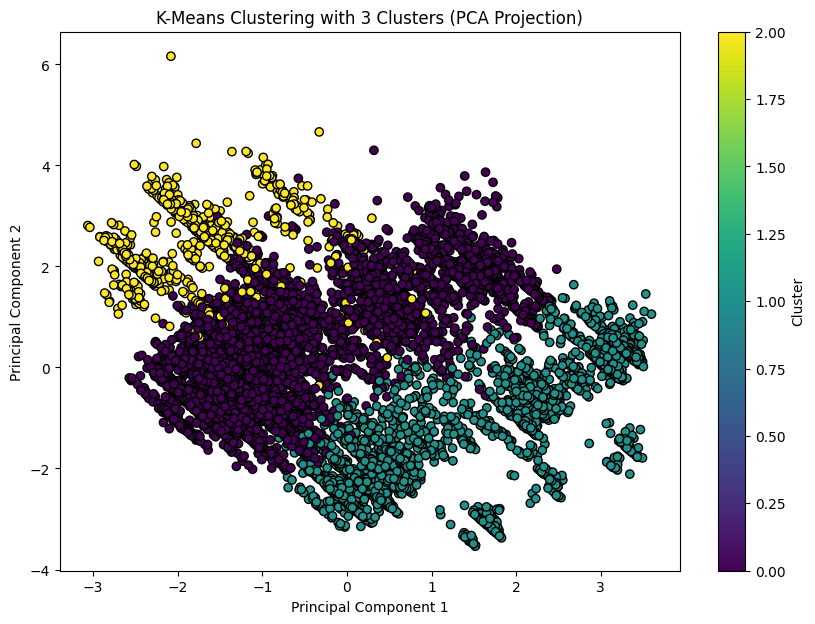

In [36]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled_standard)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled_standard)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with 3 Clusters (PCA Projection)')
plt.colorbar(label='Cluster')
plt.show()

No, we cannot clearly separate the clusters, there is significant overlap between the purple (Cluster 1) and teal (Cluster 0) regions and, while the yellow points (Cluster 2) are somewhat more separated, there are still points mixed with Cluster 1 (purple) in certain areas. 
These clusters do not form clearly distinct, separated regions, which suggests that the clustering might not have completely captured distinct segments within the data.

Spread of Clusters:
Cluster 2 (yellow) appears to be more concentrated in a specific area, while Clusters 0 and 1 are spread out across a larger region of the principal component space. This could indicate that Cluster 2 captures a more specific subset of customers with distinct characteristics, while Clusters 0 and 1 might represent more generalized or overlapping groups.

Partial Separation: The clusters show partial separation in the PCA-reduced space but are not clearly distinct. This indicates that while there may be some underlying structure in the data, it’s not strongly defined into three distinct groups. 

Complexity of Customer Segments: Given that PCA only captures the top two dimensions of variability, some of the cluster separation might be hidden in higher dimensions. However, the significant overlap here suggests that customer segments in this dataset might not be fully distinguishable using K-Means with three clusters, or that these first two components alone do not adequately capture the separation.


**c.** [2v] Plot the cluster conditional features of the frequencies of “job” and ”education” according to the clusters obtained in the previous question (2b.). Use sns.distplot (see Data Exploration notebook),with multiple="dodge",stat='density', shrink=0.8 and common_norm=False. Describe the main differences between the clusters in no more than half a page.

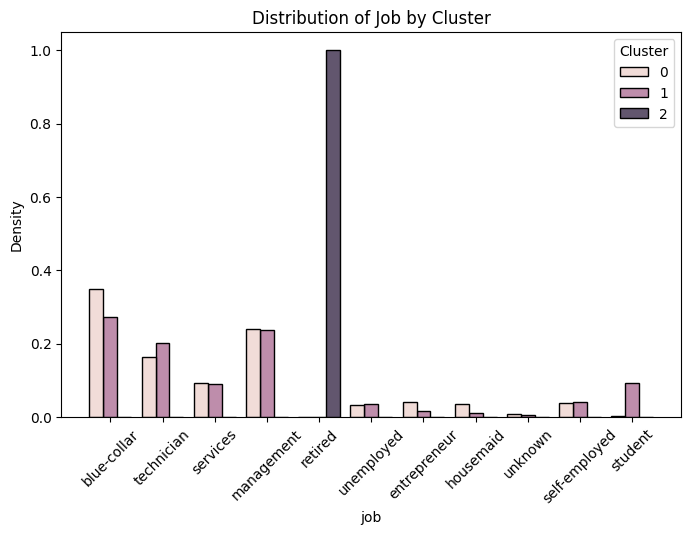

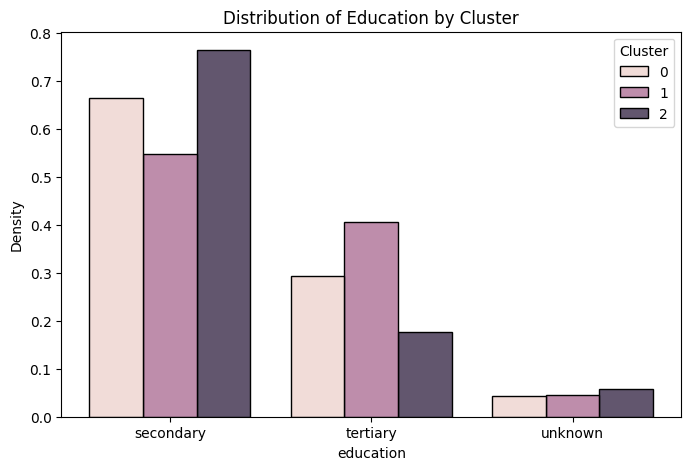

In [42]:
import seaborn as sns

job_columns = [col for col in data.columns if col.startswith('job_')]
education_columns = [col for col in data.columns if col.startswith('education_')]

# Reconstruct the "job" and "education" columns by taking the column name with the 1 for each row
data['job'] = data[job_columns].idxmax(axis=1).str.replace('job_', '')
data['education'] = data[education_columns].idxmax(axis=1).str.replace('education_', '')

plt.figure(figsize=(8, 5))
sns.histplot(data, x="job", hue="Cluster", multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title("Distribution of Job by Cluster")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data, x="education", hue="Cluster", multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title("Distribution of Education by Cluster")
plt.show()


Cluster 0 (Beige Color):
This cluster has a significant proportion of clients in "blue-collar," "technician," and "management" roles, indicating a tendency toward manual or technical labor fields.
There's also a smaller but notable representation of "services" roles.
This cluster has minimal representation among "retired" individuals.

This cluster primarily includes clients with "secondary" education, with a smaller percentage having "tertiary" education.
There is minimal representation for "unknown" education levels.
This suggests that Cluster 0 may be composed of clients who finished secondary education but did not pursue higher education as frequently as clients in Cluster 1.


Cluster 1 (Pink Color):
This cluster shows a more balanced distribution across multiple job categories compared to the other clusters.
Like Cluster 0, "blue-collar" and "technician" roles are prominent, but the cluster also includes some "services" and "management" roles.
Cluster 1 also has a significant presence of "student" and "unemployed" individuals, making it more varied in job categories.
There is a minor representation of "retired" clients, but it’s not as pronounced as in Cluster 2.
Cluster 1 has a relatively even distribution between "secondary" and "tertiary" education, with a slight preference for "secondary" education.
This indicates that Cluster 1 may have a more diverse mix in terms of educational attainment, including clients with both high school and university-level education.



Cluster 2 (Dark Purple Color):
This cluster is dominated by "retired" individuals, indicating that this cluster may represent older clients or those who are no longer part of the active workforce.
There's very little representation in other job categories for this cluster, suggesting it may be almost exclusively composed of retirees.
This cluster has a very high concentration of clients with "secondary" education and a smaller proportion with "unknown" education levels.
The representation of "tertiary" education is quite low, which may indicate that the retired individuals in this cluster often do not have university-level education.



Summary of Main Differences
Cluster 0: Composed mostly of clients in manual/technical fields with a secondary education background.
Cluster 1: A diverse cluster with various job roles and a balanced mix of secondary and tertiary education. This cluster has a broader demographic.
Cluster 2: Dominated by retired individuals, primarily with secondary education, indicating an older demographic likely outside the active workforce.
In conclusion, these clusters suggest distinct customer segments:

Cluster 0 likely represents working-class individuals with technical or service jobs.
Cluster 1 encompasses a broader mix of jobs and educational levels.
Cluster 2 represents retirees with less emphasis on higher education.